##  The source code:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
reproduction_distribution = np.array([0, 0.3, 0.7])
maximum_reproduction = len(reproduction_distribution) - 1
mu = np.sum([i * reproduction_distribution[i] for i in range(maximum_reproduction + 1)])
price_to_cost_treshold = 1 / (1 - 1 / mu)
price_to_cost_treshold

2.428571428571429

In [3]:
def reward(population, sell):
    return price * sell - cost * population

In [4]:
def approximate_Bellman_operator(V):
    iterations = 1000
    new_V = []
    optimal_sell = []
    for population in range(capacity + 1):
        Q = []
        lower_bound = np.max([population - int(capacity / maximum_reproduction), 0])
        for sell in range(lower_bound, population + 1):
            
            remaining_population = population - sell
            
            a_sample_of_the_next_states = [np.sum(np.random.choice(maximum_reproduction + 1,\
                    size = remaining_population, p = reproduction_distribution)) for _ in range(iterations)]
            
            Q.append(reward(population, sell) + discount * np.mean([V[new_population] for new_population\
                                                                    in a_sample_of_the_next_states]))
        new_V.append(np.max(Q))
        optimal_sell.append(np.argmax(Q) + lower_bound)
    return new_V, optimal_sell

In [5]:
def iterative_method(iterations, my_discount):
    plt.figure(figsize = (15, 6))
    value_axs = plt.subplot(1, 2, 1)
    sell_axs = plt.subplot(1, 2, 2)
    
    value_axs.set_title('the value function through the iterations', fontsize = 18)
    value_axs.set_xlabel('population', fontsize = 18)
    value_axs.set_ylabel('value', fontsize = 18)
    
    sell_axs.set_title('the optimall sell', fontsize = 18)
    sell_axs.set_xlabel('population', fontsize = 18)
    sell_axs.set_ylabel('sell', fontsize = 18)
    
    V = np.zeros(capacity + 1)
    global discount
    discount = my_discount
    value_axs.plot(V)
    for i in tqdm(range(iterations)):
        result = approximate_Bellman_operator(V)
        V = result[0]
        value_axs.plot(V)
    lower_bound = [np.max([int(np.ceil(population - capacity / maximum_reproduction)), 0]) for population in range(capacity + 1)]
    sell_axs.plot(result[1], color = 'red', label = 'optimal sell')
    sell_axs.plot(lower_bound, '--', color = 'blue', label = 'lower bound')
    sell_axs.plot(np.arange(capacity + 1), '--', color = 'green', label = 'upper bound')
    plt.legend()
    plt.savefig('./images/finite_capacity_with_no_overflow_estimated,capacity=%i,discount=0%d.png' %(capacity, int(my_discount * 1000)))

## Tests:

In [6]:
price = 6
cost = 1
gamma_treshold = 1 / (mu * (1 - (cost / price)))
gamma_treshold

0.7058823529411764

100%|██████████| 10/10 [00:41<00:00,  4.16s/it]


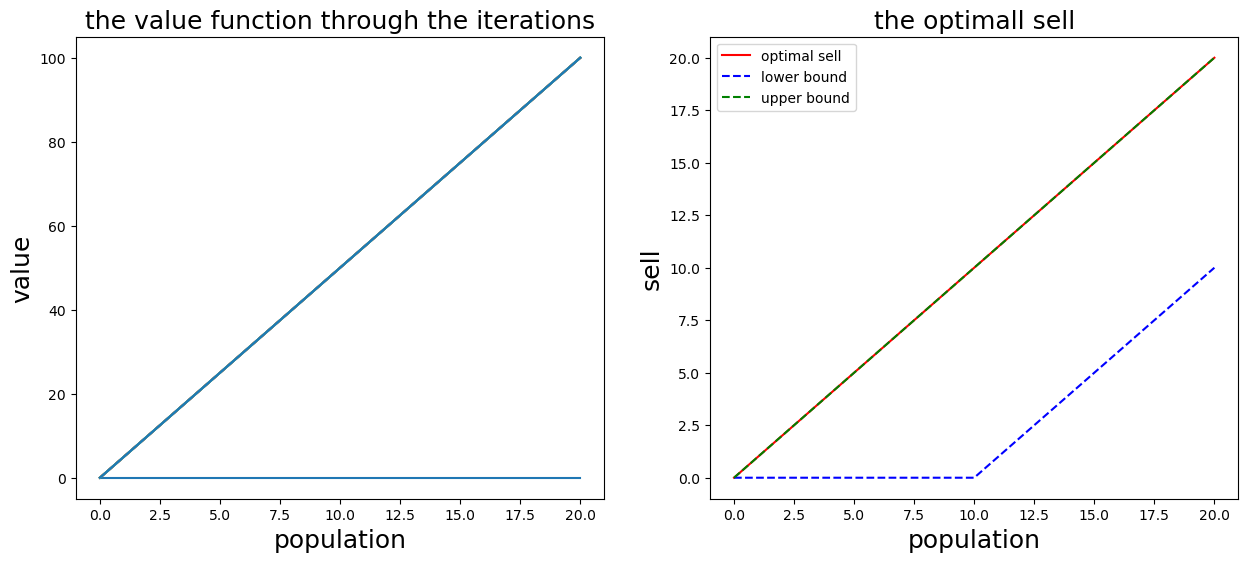

In [7]:
capacity = 20
iterative_method(10, 0.65)

100%|██████████| 10/10 [00:42<00:00,  4.28s/it]


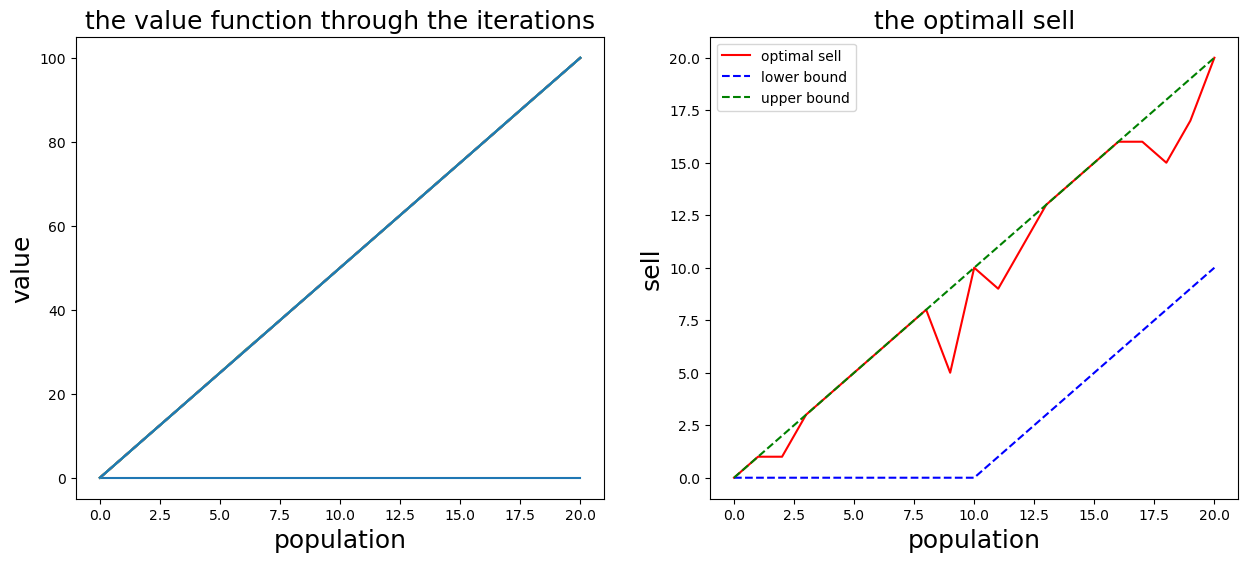

In [8]:
capacity = 20
iterative_method(10, 0.70)

100%|██████████| 10/10 [00:42<00:00,  4.25s/it]


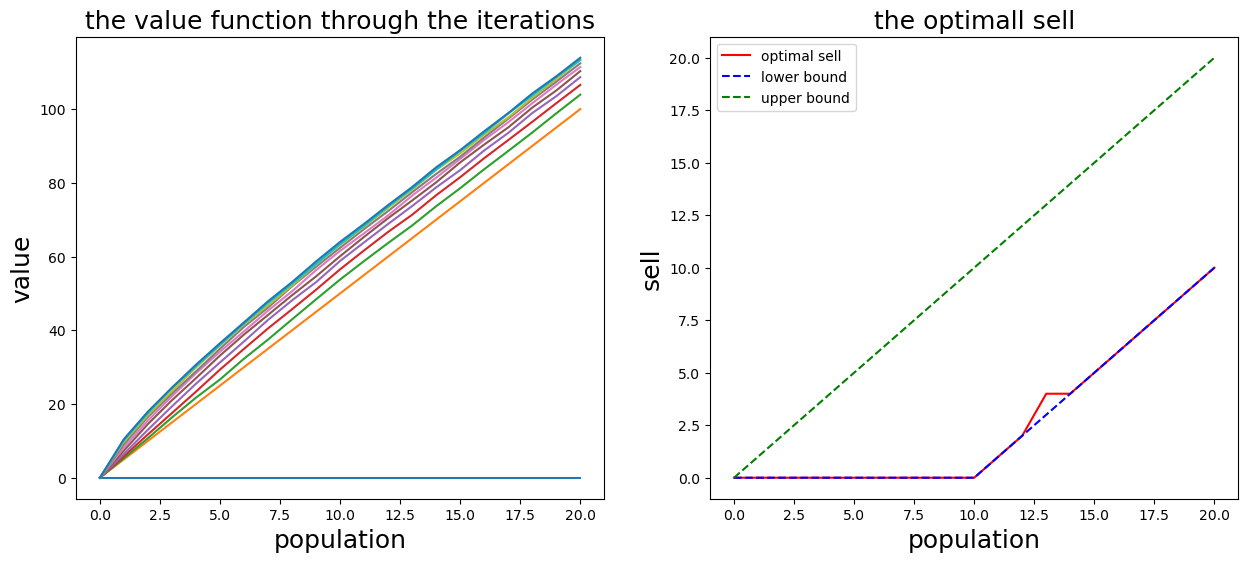

In [9]:
capacity = 20
iterative_method(10, 0.75)